In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import xgboost
from matplotlib import pyplot
# import graphviz

from sklearn.preprocessing import RobustScaler, Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

ids = test['PassengerId']

In [4]:
train = train.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1)
test = test.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1)

train['sex_f'] = np.where(train['Sex'] == 'female', 1, 0)
test['sex_f'] = np.where(test['Sex'] == 'female', 1, 0)

In [5]:
embarked_dum = pd.get_dummies(train['Embarked'], prefix='Embarked')
embarked_dum2 = pd.get_dummies(test['Embarked'], prefix='Embarked')

In [6]:
train = train.drop(['Embarked','Sex'], axis=1)
test = test.drop(['Embarked','Sex'], axis=1)

In [7]:
train = pd.concat([train, embarked_dum], axis=1)
test = pd.concat([test, embarked_dum2], axis=1)

In [8]:
X = train[[c for c in train if 'Survived' not in c]]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [9]:
preprocessing = Pipeline([
    ('impute', Imputer(missing_values='NaN', strategy='mean', axis=0)),
    ('scale', StandardScaler())
])


In [10]:
X_train_sc = preprocessing.fit_transform(X_train)
X_test_sc = preprocessing.transform(X_test)
test = preprocessing.transform(test)

In [12]:
model = xgboost.XGBClassifier(learning_rate=10,
                              seed=1,
                              nthread=4,
                              n_estimators=1
                             )
model.fit(X_train_sc, y_train)
model.score(X_test_sc, y_test)

0.84916201117318435

<bound method AxesSubplot.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f9b5aace210>>

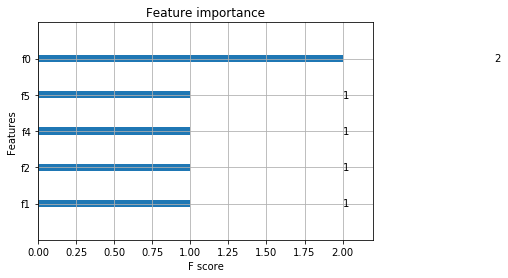

In [13]:
xgboost.plot_importance(booster=model).plot

ImportError: You must install graphviz to plot tree

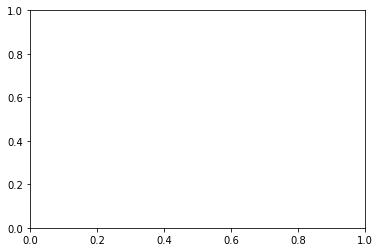

In [14]:
xgboost.plot_tree(booster=model)

In [ ]:
# xgboost.to_graphviz(booster=model)

In [ ]:
predictions = model.predict(test)

In [ ]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
print(output.head())
len(output)